
### In this notebook, all the exploratory data analysis is shown on the MPST data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import ast

In [0]:
MPST_df = pd.read_csv("/dbfs/tmp/train_test_df.csv")

In [0]:
MPST_df.head()
len(MPST_df)

14828

In [0]:
MPST_df

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,award_label
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,No award
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,No award
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,No award
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,No award
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,No award
...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","['comedy', ' murder']",test,wikipedia,No award
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","['good versus evil', ' violence']",train,wikipedia,No award
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,['anti war'],train,wikipedia,No award
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,['murder'],test,wikipedia,No award


In [0]:
MPST_df['num_tags'] = MPST_df['tags'].str.split(', ').apply(len)


In [0]:
MPST_df

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,award_label,num_tags
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,No award,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,No award,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,No award,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,No award,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,No award,10
...,...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","['comedy', ' murder']",test,wikipedia,No award,2
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","['good versus evil', ' violence']",train,wikipedia,No award,2
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,['anti war'],train,wikipedia,No award,1
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,['murder'],test,wikipedia,No award,1


In [0]:
# Compute descriptive statistics
desc_stats = {
    'Mean Tags': MPST_df['num_tags'].mean(),
    'Median Tags': MPST_df['num_tags'].median(),
    'Mode Tags': MPST_df['num_tags'].mode()[0],
    'Range of Tags': MPST_df['num_tags'].max() - MPST_df['num_tags'].min(),
    'Standard Deviation': MPST_df['num_tags'].std(),
    'Variance': MPST_df['num_tags'].var(),
    'Skewness': MPST_df['num_tags'].skew()
}

desc_stats_df = pd.DataFrame([desc_stats])

desc_stats_df

,Mean Tags,Median Tags,Mode Tags,Range of Tags,Standard Deviation,Variance,Skewness
0,2.981252,2.0,1,24,2.5999,6.759479,2.085267


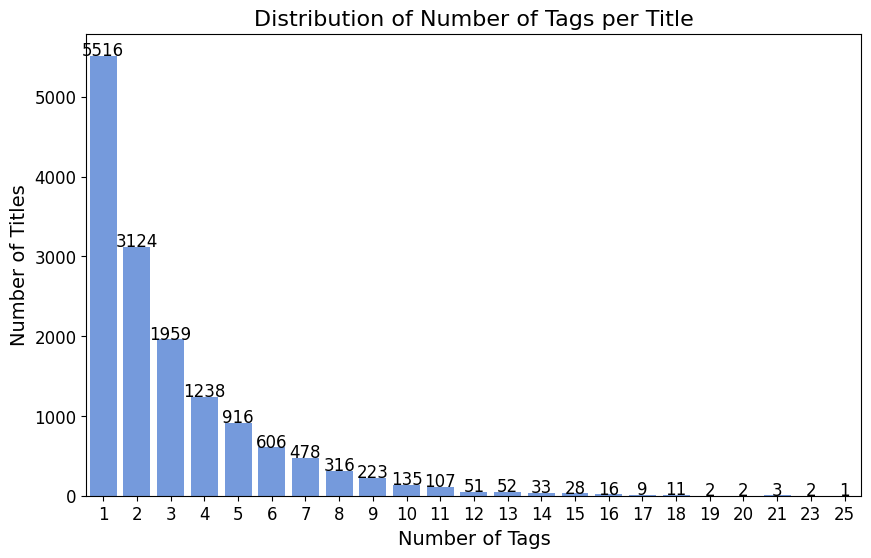

In [0]:
### Distribution of tag numbers per set of titles

tag_distribution = MPST_df['num_tags'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tag_distribution.index, y=tag_distribution.values, color='cornflowerblue')

for i, count in enumerate(tag_distribution.values):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.xlabel('Number of Tags', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.title('Distribution of Number of Tags per Title', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

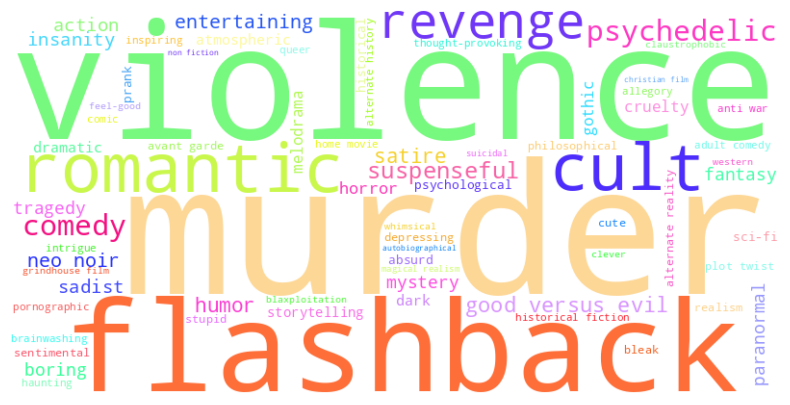

In [0]:
#### MAKING WORDCLOUD:

# convert string representations of lists into actual lists
MPST_df['tags'] = MPST_df['tags'].dropna().apply(ast.literal_eval)  

# flatten the list of tags
all_tags = [tag.strip() for sublist in MPST_df['tags'] for tag in sublist]

tag_freq = Counter(all_tags)

def colorful_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    hue = random_state.randint(0, 360) 
    saturation = 90 + random_state.randint(0, 10) 
    lightness = 50 + random_state.randint(0, 30)
    return f"hsl({hue}, {saturation}%, {lightness}%)"

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=colorful_color_func).generate_from_frequencies(tag_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
### TOP 30 COMMON AND RAREST TAGS:

tag_counts = Counter(all_tags)

sorted_tags = tag_counts.most_common()

top_30_tags = sorted_tags[:30]

rare_30_tags = sorted_tags[-30:]

print("Top 30 Most Common Tags:")
for tag, count in top_30_tags:
    print(f"{tag}: {count}")

print("\nRarest 30 Tags:")
for tag, count in rare_30_tags:
    print(f"{tag}: {count}")

Top 30 Most Common Tags:
murder: 5782
violence: 4426
flashback: 2937
romantic: 2906
cult: 2647
revenge: 2468
psychedelic: 1897
comedy: 1859
suspenseful: 1086
good versus evil: 875
humor: 822
satire: 816
entertaining: 749
neo noir: 745
action: 664
sadist: 652
insanity: 636
tragedy: 597
fantasy: 564
paranormal: 546
boring: 525
mystery: 519
horror: 486
melodrama: 457
cruelty: 442
gothic: 441
dramatic: 412
dark: 405
atmospheric: 396
storytelling: 364

Rarest 30 Tags:
alternate reality: 205
realism: 204
cute: 197
stupid: 190
intrigue: 168
pornographic: 163
home movie: 153
haunting: 151
historical fiction: 143
allegory: 139
adult comedy: 128
thought-provoking: 120
inspiring: 118
anti war: 118
comic: 114
brainwashing: 107
alternate history: 102
queer: 98
clever: 87
claustrophobic: 84
whimsical: 79
feel-good: 76
blaxploitation: 74
western: 73
grindhouse film: 66
suicidal: 54
magical realism: 54
autobiographical: 44
christian film: 42
non fiction: 37


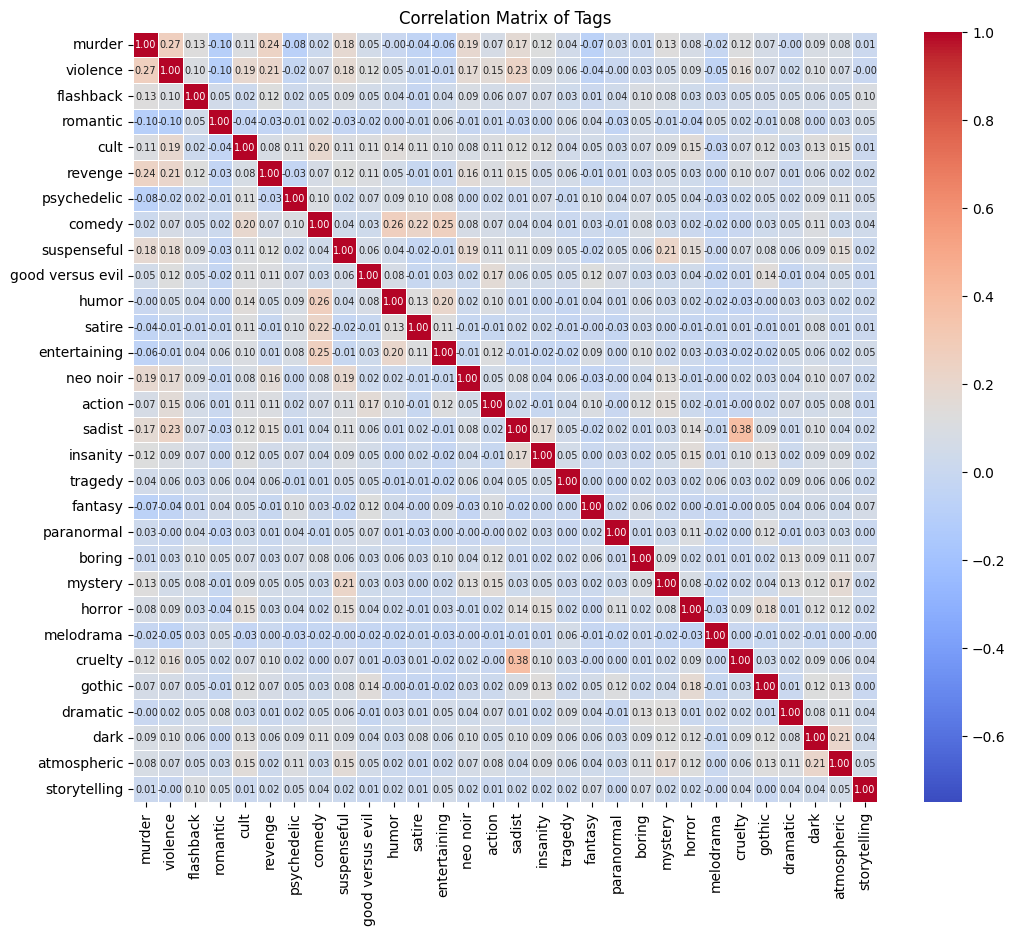

In [0]:
### CORRELATION PLOT OF TOP 10 TAGS:

correlation_df = MPST_df.copy()
tags_list = [
    'murder', 'violence', 'flashback', 'romantic', 'cult', 'revenge', 'psychedelic',
    'comedy', 'suspenseful', 'good versus evil', 'humor', 'satire', 'entertaining',
    'neo noir', 'action', 'sadist', 'insanity', 'tragedy', 'fantasy', 'paranormal',
    'boring', 'mystery', 'horror', 'melodrama', 'cruelty', 'gothic', 'dramatic',
    'dark', 'atmospheric', 'storytelling'
]

#check if a tag is present in each row
def tag_presence(row, tag):
    return 1 if tag in row else 0

#create binary presence/absence matrix for the top tags
for tag in tags_list:
    correlation_df[tag] = correlation_df['tags'].apply(lambda x: tag in str(x))

corr_matrix = correlation_df[tags_list].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7}, vmin=-0.75, vmax=1)
plt.title('Correlation Matrix of Tags', fontsize=12)
plt.show()

In [0]:
MPST_df

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,award_label,num_tags
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"[cult, horror, gothic, murder, atmospheric]",train,imdb,No award,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",[violence],train,imdb,No award,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",[romantic],test,imdb,No award,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","[inspiring, romantic, stupid, feel-good]",train,imdb,No award,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","[cruelty, murder, dramatic, cult, violence...",val,imdb,No award,10
...,...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","[comedy, murder]",test,wikipedia,No award,2
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","[good versus evil, violence]",train,wikipedia,No award,2
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,[anti war],train,wikipedia,No award,1
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,[murder],test,wikipedia,No award,1


#### Exploration of Other Features: title, synopsis, awards:

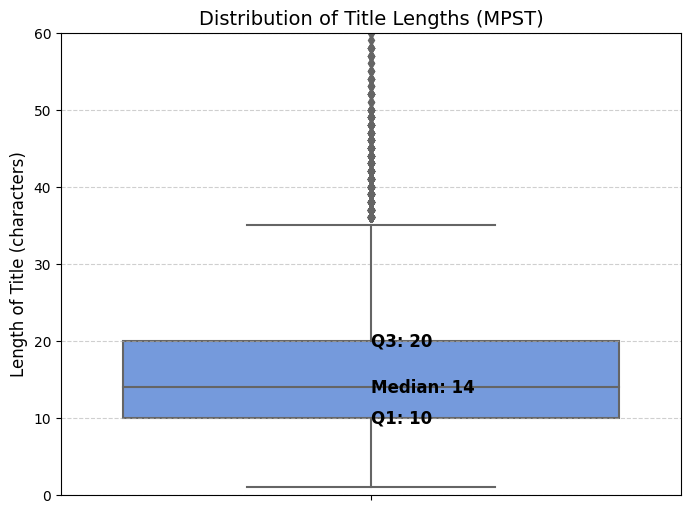

In [0]:
### TITLE

# Assuming MPST and videoland_df are already loaded
MPST_df["title_length"] = MPST_df["title"].astype(str).apply(len)

def plot_boxplot(data, title, color):
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=data, color=color)

    # quantiles
    quantiles = data.quantile([0.25, 0.5, 0.75]).values

    # Annotate quantiles on the plot
    for q, label in zip(quantiles, ['Q1', 'Median', 'Q3']):
        ax.text(0, q, f'{label}: {int(q)}', ha='left', va='center', 
                fontsize=12, fontweight='bold', color='black')

    plt.title(title, fontsize=14)
    plt.ylabel('Length of Title (characters)', fontsize=12)
    plt.ylim(0, 60)
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add horizontal grid lines

    plt.show()

plot_boxplot(MPST_df["title_length"], 'Distribution of Title Lengths (MPST)', 'cornflowerblue')

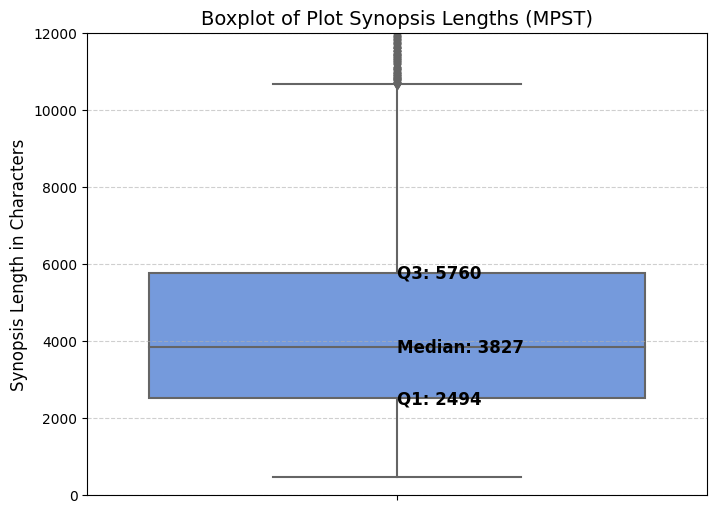

In [0]:
### SYNOPSIS:

MPST_df["plot_length"] = MPST_df["plot_synopsis"].astype(str).apply(len)

def plot_boxplot(data, title, color, y_limit):
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y=data, color=color)

    quantiles = data.quantile([0.25, 0.5, 0.75]).values

    for q, label in zip(quantiles, ['Q1', 'Median', 'Q3']):
        ax.text(0, q, f'{label}: {int(q)}', ha='left', va='center', 
                fontsize=12, fontweight='bold', color='black')

    # Customize the plot
    plt.title(title, fontsize=14)
    plt.ylabel('Synopsis Length in Characters', fontsize=12)
    plt.ylim(0, y_limit)
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add horizontal grid lines

    # Show the plot
    plt.show()

# Plot boxplot for MPST plot synopsis lengths
plot_boxplot(MPST_df["plot_length"], 'Boxplot of Plot Synopsis Lengths (MPST)', 'cornflowerblue', 12000)


In [0]:
# Compute character lengths of award_label values
MPST_df["award_label_length"] = MPST_df["award_label"].astype(str).apply(len)

# Calculate descriptive statistics
mean_length = MPST_df["award_label_length"].mean()
median_length = MPST_df["award_label_length"].median()
min_length = MPST_df["award_label_length"].min()
max_length = MPST_df["award_label_length"].max()
range_length = max_length - min_length
variance_length = MPST_df["award_label_length"].var()
std_dev_length = MPST_df["award_label_length"].std()

stats = {
    "Mean Length": mean_length,
    "Median Length": median_length,
    "Min Length": min_length,
    "Max Length": max_length,
    "Range": range_length,
    "Variance": variance_length,
    "Standard Deviation": std_dev_length,
}

for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Mean Length: 20.18
Median Length: 8.00
Min Length: 5.00
Max Length: 2449.00
Range: 2444.00
Variance: 4041.08
Standard Deviation: 63.57


In [0]:
MPST_df

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,award_label,num_tags,title_length,plot_length,award_label_length
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"[cult, horror, gothic, murder, atmospheric]",train,imdb,No award,5,23,7527,8
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",[violence],train,imdb,No award,1,45,2077,8
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",[romantic],test,imdb,No award,1,26,4003,8
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","[inspiring, romantic, stupid, feel-good]",train,imdb,No award,4,18,13215,8
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","[cruelty, murder, dramatic, cult, violence...",val,imdb,No award,10,8,17575,8
...,...,...,...,...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","[comedy, murder]",test,wikipedia,No award,2,13,2607,8
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","[good versus evil, violence]",train,wikipedia,No award,2,10,3241,8
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,[anti war],train,wikipedia,No award,1,10,2483,8
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,[murder],test,wikipedia,No award,1,9,2281,8


In [0]:
MPST_df = MPST_df[['imdb_id', 'title', 'plot_synopsis', 'tags', 'split', 'award_label', 'num_tags', 'title_length', 'plot_length', 'award_label_length']]

In [0]:
no_award_count = MPST_df[MPST_df["award_label"] == "No award"].shape[0]
print(f"Number of rows with 'No award': {no_award_count}")

Number of rows with 'No award': 13055


In [0]:
# Filter rows where the number of tags is at most 10
filtered_df = MPST_df[MPST_df['num_tags'] <= 10]

# Save the filtered dataset
filtered_df.to_csv("/dbfs/tmp/model_ready_MPST.csv", index=False)

In [0]:
filtered_df

,imdb_id,title,plot_synopsis,tags,split,award_label,num_tags,title_length,plot_length,award_label_length
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"[cult, horror, gothic, murder, atmospheric]",train,No award,5,23,7527,8
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",[violence],train,No award,1,45,2077,8
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",[romantic],test,No award,1,26,4003,8
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","[inspiring, romantic, stupid, feel-good]",train,No award,4,18,13215,8
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","[cruelty, murder, dramatic, cult, violence...",val,No award,10,8,17575,8
...,...,...,...,...,...,...,...,...,...,...
14823,tt0219952,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...","[comedy, murder]",test,No award,2,13,2607,8
14824,tt1371159,Iron Man 2,"In Russia, the media covers Tony Stark's discl...","[good versus evil, violence]",train,No award,2,10,3241,8
14825,tt0063443,Play Dirty,During the North African Campaign in World War...,[anti war],train,No award,1,10,2483,8
14826,tt0039464,High Wall,Steven Kenet catches his unfaithful wife in th...,[murder],test,No award,1,9,2281,8



#### BERT Embeddings

In [0]:
from transformers import BertTokenizer, BertModel
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from transformers import AutoTokenizer, AutoModel
import torch

In [0]:
MPST_tags = [
    'absurd', 'action', 'adult comedy', 'allegory', 'alternate history', 'alternate reality', 
    'anti war', 'atmospheric', 'autobiographical', 'avant garde', 'blaxploitation', 'bleak', 
    'boring', 'brainwashing', 'christian film', 'claustrophobic', 'clever', 'comedy', 'comic', 
    'cruelty', 'cult', 'cute', 'dark', 'depressing', 'dramatic', 'entertaining', 'fantasy', 
    'feel-good', 'flashback', 'good versus evil', 'gothic', 'grindhouse film', 'haunting', 
    'historical', 'historical fiction', 'home movie', 'horror', 'humor', 'insanity', 'inspiring', 
    'intrigue', 'magical realism', 'melodrama', 'murder', 'mystery', 'neo noir', 'non fiction', 
    'paranormal', 'philosophical', 'plot twist', 'pornographic', 'prank', 'psychedelic', 
    'psychological', 'queer', 'realism', 'revenge', 'romantic', 'sadist', 'satire', 'sci-fi', 
    'sentimental', 'storytelling', 'stupid', 'suicidal', 'suspenseful', 'thought-provoking', 
    'tragedy', 'violence', 'western', 'whimsical'
]

In [0]:
# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModel.from_pretrained('bert-base-cased', output_hidden_states=True).eval()

# Function to compute word embedding for a tag
def get_word_embedding(tag):
    #Tokenize the tag and convert it to tensor format
    inputs = tokenizer(tag, return_tensors='pt', padding=True, truncation=True)
    
    # Forward pass through the model
    with torch.no_grad():  # We don't need gradients here
        outputs = model(**inputs)
    
    #get the hidden states (last layer hidden state) of the model
    hidden_states = outputs.last_hidden_state
    
    # We can take the mean of all token embeddings in the sequence
    embedding = hidden_states.mean(dim=1)  # Mean across tokens
    # Remove unnecessary dimensions
    return embedding.squeeze()  

# compute embeddings for all tags
embeddings = torch.stack([get_word_embedding(tag) for tag in MPST_tags])

# convert embeddings to a numpy array for further processing
embeddings_np = embeddings.numpy()

# apply t-SNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
embeddings_3d = tsne.fit_transform(embeddings_np)

# create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c='blue', s=80)

ax.set_title("3D Visualization of BERT Embeddings for MPST Tags", fontsize=16)

plt.tight_layout()
plt.show()